In [ ]:
# Importing necessary libraries

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# making documents(strings) to perform pre-processing


document1='Hello,How are you?'
document2='I"m fine and what about you?'
document3='All good. I"m glad to know you are also fine.'
document4='I"m always fine and fit. By the way, how are you doing in your academics?'
document5='Not stable as I"m also preparing for Master"s.'


In [ ]:
# tokenize the documents

tokenized_document=[]
for x in range(1,6):
    tokenized_document.append(list(set(nltk.word_tokenize(eval('document{}'.format(x))))))

print(tokenized_document)

[['you', '?', 'are', ',', 'How', 'Hello'], ['you', "''", '?', 'and', 'm', 'what', 'fine', 'about', 'I'], ['glad', 'you', 'know', '.', "''", 'm', 'to', 'are', 'also', 'good', 'fine', 'All', 'I'], ['?', 'the', 'By', 'your', 'way', '.', 'and', 'm', ',', 'are', 'always', 'fine', 'academics', 'in', 'you', 'doing', 'how', 'fit', "''", 'I'], ['.', "''", 'for', 'stable', 'm', 'as', 'Not', 'preparing', 'also', 's', 'Master', 'I']]


In [ ]:
# lowercase conversion of tokens

for x in range(0,5):
    tokenized_document[x]=[y.lower() for y in tokenized_document[x]]

print(tokenized_document)

[['you', '?', 'are', ',', 'how', 'hello'], ['you', "''", '?', 'and', 'm', 'what', 'fine', 'about', 'i'], ['glad', 'you', 'know', '.', "''", 'm', 'to', 'are', 'also', 'good', 'fine', 'all', 'i'], ['?', 'the', 'by', 'your', 'way', '.', 'and', 'm', ',', 'are', 'always', 'fine', 'academics', 'in', 'you', 'doing', 'how', 'fit', "''", 'i'], ['.', "''", 'for', 'stable', 'm', 'as', 'not', 'preparing', 'also', 's', 'master', 'i']]


In [ ]:
# removing stop words from documents

stop_words=stopwords.words('english')
stop_words.extend([',','?','""',"''",'.'])
# print(stop_words)

for x in stop_words:
    for y in range(0,5):
        if x in tokenized_document[y]:
            tokenized_document[y].remove(x)

print(tokenized_document)

[['hello'], ['fine'], ['glad', 'know', 'also', 'good', 'fine'], ['way', 'always', 'fine', 'academics', 'fit'], ['stable', 'preparing', 'also', 'master']]


In [ ]:
# performing stemming after removing stop words

stemmed_document=tokenized_document
ps = PorterStemmer()
for x in range(0,5):
    stemmed_document[x]=[ps.stem(y) for y in tokenized_document[x]]

print(stemmed_document)

[['hello'], ['fine'], ['glad', 'know', 'also', 'good', 'fine'], ['way', 'alway', 'fine', 'academ', 'fit'], ['stabl', 'prepar', 'also', 'master']]


In [ ]:
# collecting distinct words in the saperate list

total_words=[]
for x in range(0,5):
    temp=[y for y in stemmed_document[x]]
    total_words.extend(temp)

total_words=list(set(total_words))

print(total_words)

['glad', 'know', 'prepar', 'academ', 'stabl', 'also', 'fine', 'good', 'master', 'alway', 'fit', 'hello', 'way']


In [ ]:
# making matrix of word-document relation

relation=[]
print("\t\t",end=" ")
for x in total_words:
    print(x+" ",end="\t")
print()
for x in range(0,5):
    print('document{}'.format(x+1),end="\t")
    temp=[]
    for element in total_words:
        if element in stemmed_document[x]:
            temp.extend([1])
            print("1",end="\t")
        else:
            temp.extend([0])
            print("0",end="\t")
    print()
    relation.append(temp)

# prinr(relation)

		 glad 	know 	prepar 	academ 	stabl 	also 	fine 	good 	master 	alway 	fit 	hello 	way 	
document1	0	0	0	0	0	0	0	0	0	0	0	1	0	
document2	0	0	0	0	0	0	1	0	0	0	0	0	0	
document3	1	1	0	0	0	1	1	1	0	0	0	0	0	
document4	0	0	0	1	0	0	1	0	0	1	1	0	1	
document5	0	0	1	0	1	1	0	0	1	0	0	0	0	


In [ ]:
# Represent term frequencies for each unique words

freq=total_words[:]
for x in range(len(total_words)):
    freq[x]=[row[x] for row in relation].count(1)
# print(freq)

document_count=[]
for x in relation:
    document_count.extend([x.count(1)])
# print(document_count)

for x in range(len(total_words)):
        print(total_words[x],"->",str(freq[x]),end="\t")

glad -> 1	know -> 1	prepar -> 1	academ -> 1	stabl -> 1	also -> 2	fine -> 3	good -> 1	master -> 1	alway -> 1	fit -> 1	hello -> 1	way -> 1	

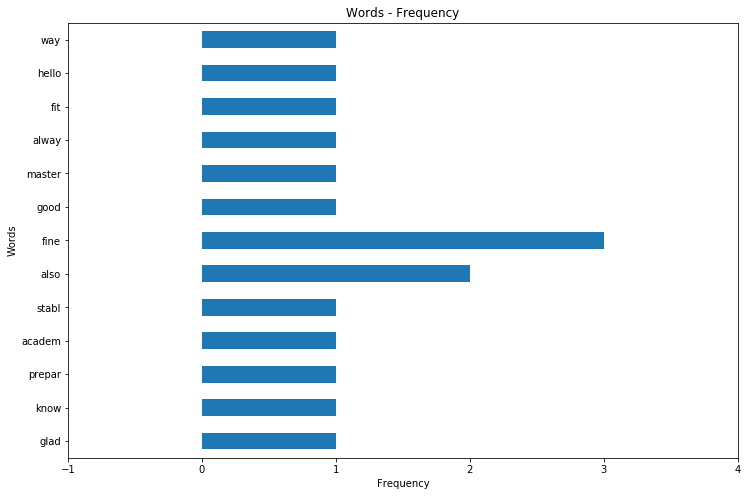

In [ ]:
# visualize the data using histogram
# Plot word frequencies

freq_series = pd.Series(freq)

y_labels = total_words[:]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='barh')
ax.set_title('Words - Frequency')
ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
ax.set_yticklabels(y_labels)
ax.set_xlim(min(freq)-2,max(freq)+1) # expand xlim to make labels easier to read

rects = ax.patches

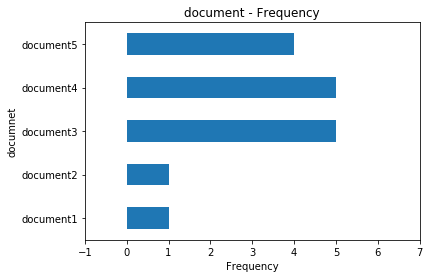

In [ ]:
# visualize the documnet using histogram

freq_series = pd.Series(document_count)

y_labels = [('document{}'.format(x)) for x in range(1,6)]

# Plot the figure.
# plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='barh')
ax.set_title('document - Frequency')
ax.set_xlabel('Frequency')
ax.set_ylabel('documnet')
ax.set_yticklabels(y_labels)
ax.set_xlim(min(document_count)-2,max(document_count)+2) # expand xlim to make labels easier to read

rects = ax.patches

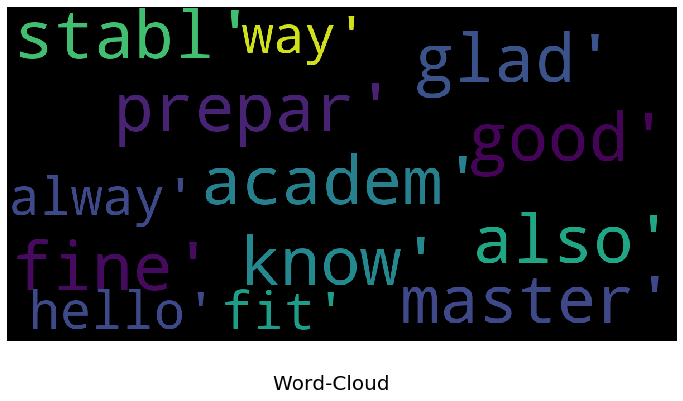

In [ ]:
# Show word cloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(total_words,title='Word-Cloud')

In [ ]:
# clustering

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer( max_features=200000,
                                  stop_words='english',
                                 use_idf=True, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(total_words) #fit the vectorizer to synopses

# print(tfidf_matrix.shape)

In [ ]:
dist = 1 - cosine_similarity(tfidf_matrix)

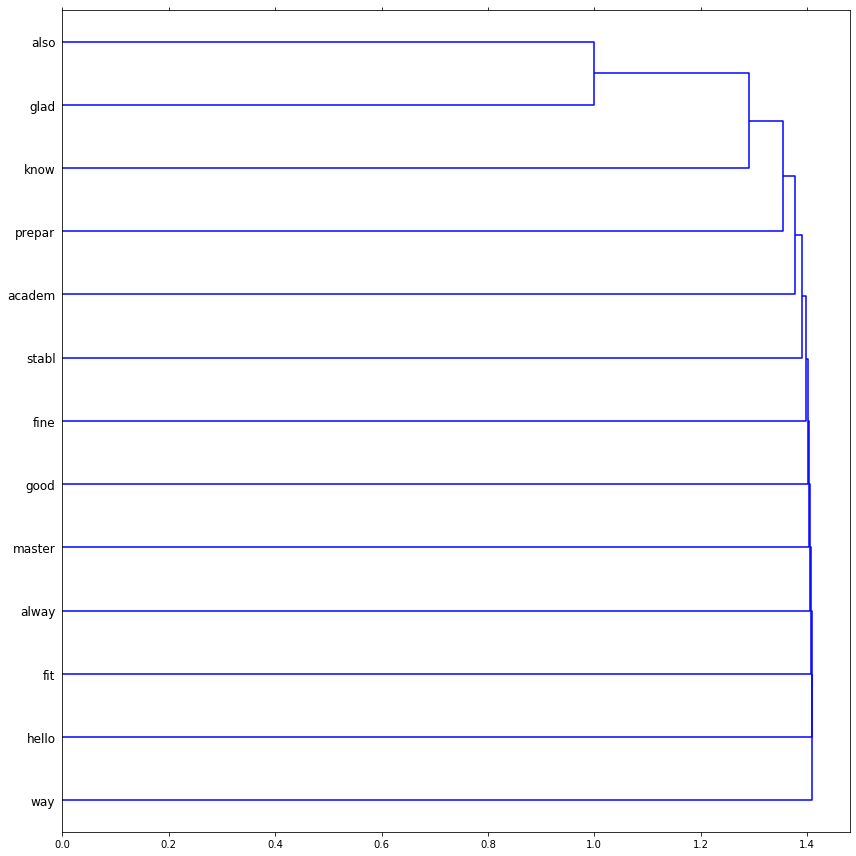

In [ ]:
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(12,12)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=total_words);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout()

plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [ ]:
# calculating the IDF values for corpus

IDF=freq[:]
for x in range(len(freq)):
    temp=math.log((len(document_count)+1)/(freq[x]+1))+1
    IDF[x]=temp
# print(IDF)

In [ ]:
# calculating the TF values for document

TF=relation[:]
for x in range(len(relation)):
    TF[x]=[y/document_count[x] for y in (relation[x])]

# print(TF)

In [ ]:
# TF-IDF matrix without normalize

TF_IDF=TF[:]
for x in range(len(TF)):
    TF_IDF[x]=[TF[x][y]*IDF[y] for y in range(len(TF[x]))]

# print(TF_IDF)

In [ ]:
# TF-IDF matrix with normalize

for x in range(len(TF_IDF)):
    temp=sum([y*y for y in TF_IDF[x]])
    TF_IDF[x]=[y/math.sqrt(temp) for y in (TF_IDF[x])]

# print(TF_IDF)

In [ ]:
# TF-IDF representation

print("\t\t",end=" ")
for x in total_words:
    print(x+" ",end="\t")
print()
for x in range(0,len(document_count)):
    print('document{}'.format(x+1),end="\t")
    for y in TF_IDF[x]:
        print(round(y,4),end="\t")
    print()


In [ ]:
# enter query for the search

text=input("Enter the text :- ")

In [ ]:
# pre-processing the query

tokens=list(set(nltk.word_tokenize(text)))
print('tokens:-',tokens)
print()

tokens_lower=[y.lower() for y in tokens]
print('lower:-',tokens_lower)
print()

for x in stop_words:
    if x in tokens_lower:
        tokens_lower.remove(x)
print('stopword removed:-',tokens_lower)
print()

stemmed_query=[ps.stem(y) for y in tokens_lower]
print('stemmed form:-',stemmed_query)
print()


In [ ]:
# representation of query

query_vector=[]
for x in total_words:
    if x in stemmed_query:
        query_vector.extend([1])
    else:
        query_vector.extend([0])

# print(query_vector)

print("\t",end=" ")
for x in total_words:
    print(x+" ",end="\t")
print()
print('query',end='\t')
for x in query_vector:
    print(str(x)+" ",end='\t')
print()

In [ ]:
# TF_IDF representation of the query

query_freq=query_vector.count(int(1))
query_vector=[query_vector[y]*IDF[y]/query_freq for y in range(len(query_vector))]

print("\t",end=" ")
for x in total_words:
    print(x+" ",end="\t")
print()
print('query',end='\t')
for x in query_vector:
    print(str(round(x,4))+" ",end='\t')
print()

In [ ]:
# cosine similarity

cosine_values=[0 for x in range(len(TF_IDF))]
squared_values=[0 for x in range(len(TF_IDF))]
for x in range(len(TF_IDF)):
    for y in range(len(TF_IDF[x])):
        cosine_values[x]+=TF_IDF[x][y]*query_vector[y]
        squared_values[x]+=TF_IDF[x][y]*TF_IDF[x][y]

query_square=sum([y*y for y in query_vector])
final_similarity=[0 for x in range(len(TF_IDF))]
for x in range(len(final_similarity)):
    final_similarity[x]=cosine_values[x]/(math.sqrt(squared_values[x])*math.sqrt(query_square))

order=sorted(final_similarity)
order=order[::-1]
print("\t\tCosine-Similarity")
print()
for x in range(0,len(order)):
    print('document{}'.format(final_similarity.index(order[x])+1),end="\t")
    print(round(order[x],5),end="\t")
    print()